In [1]:
#Basic Libararies
import numpy as np
import pandas as pd

#Visualization libararies
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation Libararies
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

#Deep Learning Libararies
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

In [2]:
fashion_train=pd.read_csv('fashion-mnist_train.csv')
fashion_test=pd.read_csv('fashion-mnist_test.csv')

In [7]:
fashion_train.shape

(60000, 785)

In [3]:
x_train_fashion=fashion_train.drop('label',axis=1)
y_train_fashion=fashion_train['label']
x_test_fashion=fashion_test.drop('label',axis=1)
y_test_fashion=fashion_test['label']

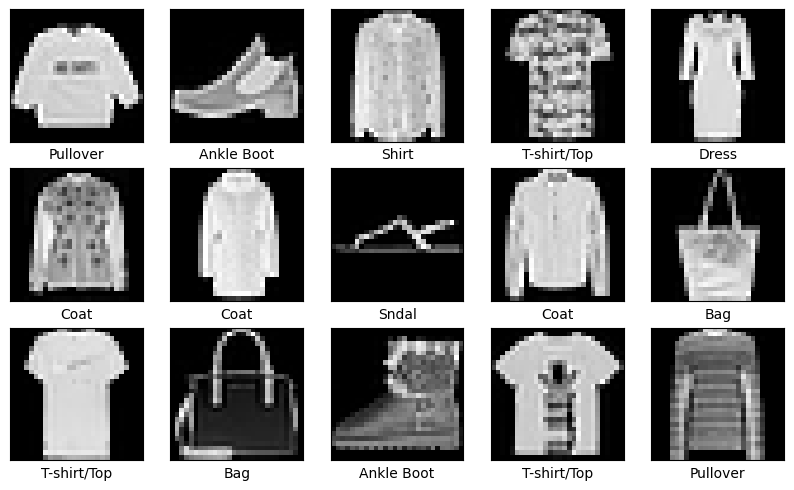

In [4]:
#Reshaping the dataset
x_train_reshape=x_train_fashion.values.reshape(-1,28,28)
x_test_reshape=x_test_fashion.values.reshape(-1,28,28)

#Names of clothing accessories in order
col_names=['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sndal','Shirt','Sneaker','Bag','Ankle Boot']

#Visualization the digit
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_reshape[i], cmap='gray')
    plt.xlabel(col_names[y_train_fashion[i]])
plt.show()

In [6]:
y_train_fashion.shape

(60000,)

In [8]:
#Encoding Digit Mnist Lables
y_train_fashion = to_categorical(y_train_fashion, num_classes=10)

y_test_fashion = to_categorical(y_test_fashion, num_classes=10)

In [9]:
#Create base neural network

model= keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(10, activation='softmax')
])

#Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#Fitting the model
history=model.fit(x_train_fashion, y_train_fashion, batch_size=100, epochs=30, validation_data=(x_test_fashion, y_test_fashion))

Epoch 1/30
600/600 [==============================] - 7s 7ms/step - loss: 1.1136 - accuracy: 0.6236 - val_loss: 0.5332 - val_accuracy: 0.8252
Epoch 2/30
600/600 [==============================] - 3s 6ms/step - loss: 0.7501 - accuracy: 0.7465 - val_loss: 0.4811 - val_accuracy: 0.8357
Epoch 3/30
600/600 [==============================] - 3s 6ms/step - loss: 0.6687 - accuracy: 0.7751 - val_loss: 0.4474 - val_accuracy: 0.8488
Epoch 4/30
600/600 [==============================] - 3s 6ms/step - loss: 0.6262 - accuracy: 0.7921 - val_loss: 0.4474 - val_accuracy: 0.8499
Epoch 5/30
600/600 [==============================] - 3s 5ms/step - loss: 0.6170 - accuracy: 0.7952 - val_loss: 0.4556 - val_accuracy: 0.8515
Epoch 6/30
600/600 [==============================] - 3s 5ms/step - loss: 0.6132 - accuracy: 0.7957 - val_loss: 0.4627 - val_accuracy: 0.8555
Epoch 7/30
600/600 [==============================] - 3s 6ms/step - loss: 0.6041 - accuracy: 0.7986 - val_loss: 0.4433 - val_accuracy: 0.8618
Epoch 

In [10]:
test_loss_fashion, test_acc_fashion= model.evaluate(x_test_fashion, y_test_fashion)

313/313 [==============================] - 1s 2ms/step - loss: 0.3904 - accuracy: 0.8674


In [11]:
print('Fashion MNIST test accuracy:',round(test_acc_fashion,4))

Fashion MNIST test accuracy: 0.8674


In [12]:
y_predict=model.predict(x_test_fashion)
y_predict=np.argmax(y_predict, axis=1) #Here we get index of maximum value in the Encoded vector
y_test_fashion_eval=np.argmax(y_test_fashion, axis=1)

313/313 [==============================] - 1s 2ms/step


C:\Users\mdfai\AppData\Local\Temp\ipykernel_9420\1641300556.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


<function matplotlib.pyplot.show(close=None, block=None)>

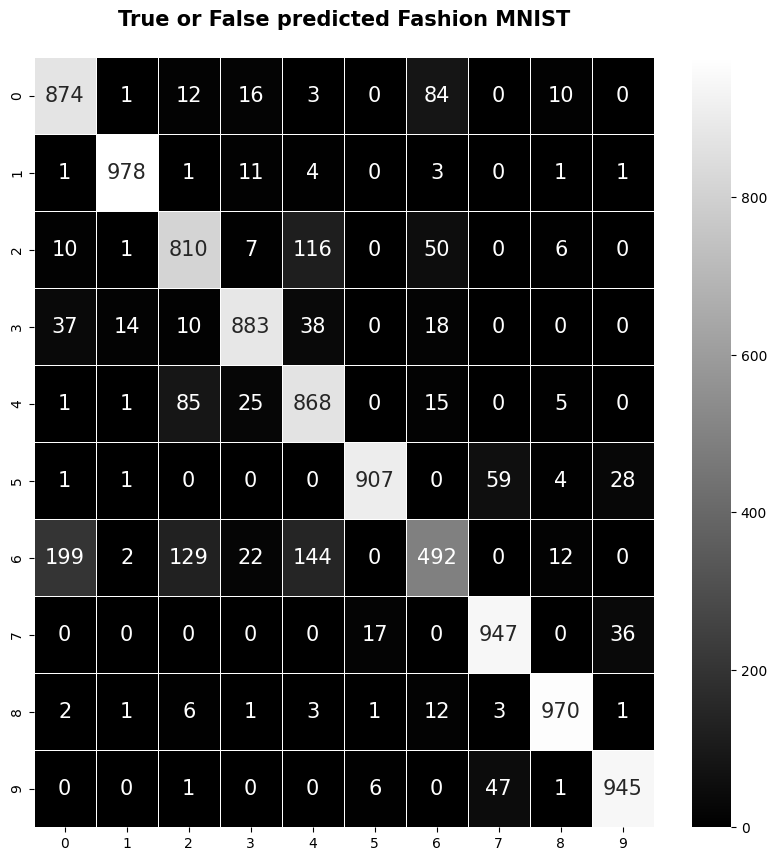

In [15]:
#Confusion Matrix for fashion MNIST

cm=confusion_matrix(y_test_fashion_eval,y_predict)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, annot_kws={'size':15}, linewidth=0.5, fmt='d', cmap='gray')
plt.title('True or False predicted Fashion MNIST\n', fontweight='bold', fontsize=15)
plt.show

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test_fashion_eval,y_predict))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82      1000
           1       0.98      0.98      0.98      1000
           2       0.77      0.81      0.79      1000
           3       0.92      0.88      0.90      1000
           4       0.74      0.87      0.80      1000
           5       0.97      0.91      0.94      1000
           6       0.73      0.49      0.59      1000
           7       0.90      0.95      0.92      1000
           8       0.96      0.97      0.97      1000
           9       0.93      0.94      0.94      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.86     10000
weighted avg       0.87      0.87      0.86     10000



In [18]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


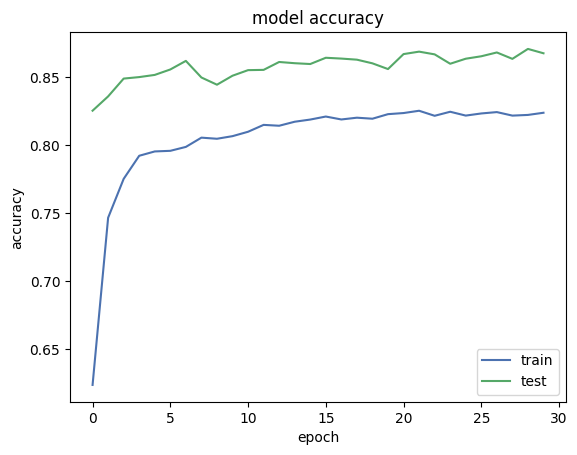

In [19]:
#Summary history for accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'], loc='best')
plt.show()

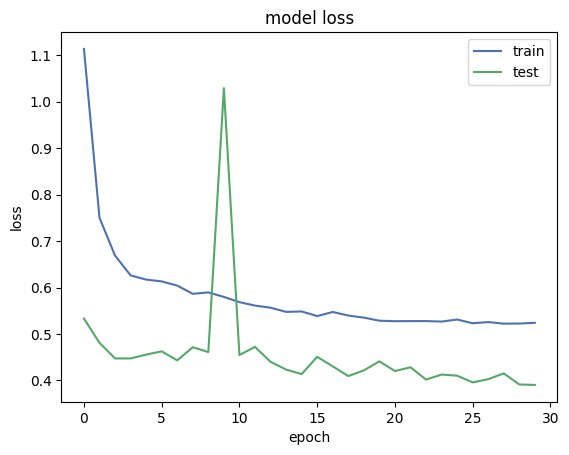

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'], loc='best')
plt.show()

In [21]:
#ft. expand_dmis(x_test_digit[0])
y_predict_single=model.predict(x_test_fashion.loc[[0],:].values)
y_predict_single=np.argmax(y_predict_single, axis=1) #Here we get index of maximum value in the Encoded vector

1/1 [==============================] - 0s 31ms/step


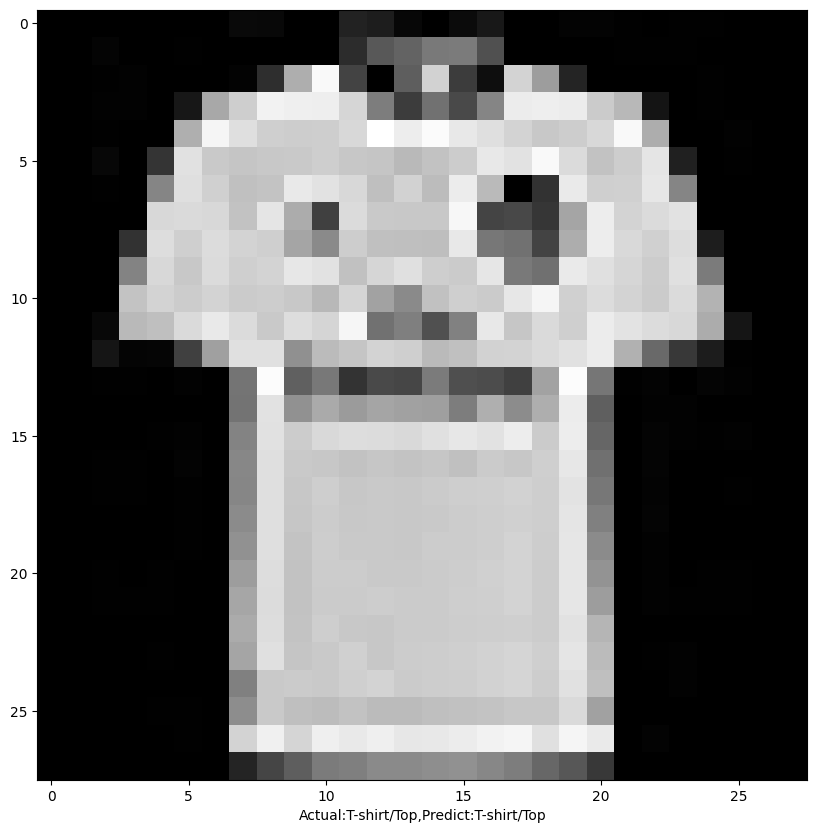

In [23]:
#Names of clothing accessories in order
col_names=['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sndal','Shirt','Sneaker','Bag','Ankle Boot']

#Visualization the digit
plt.figure(figsize=(10,10))
plt.imshow(x_test_reshape[0], cmap='gray')
plt.xlabel('Actual:{},Predict:{}'.format(col_names[y_test_fashion_eval[0]],col_names[y_predict_single[0]]))
plt.show()